<a href="https://colab.research.google.com/github/Adithya-Siddam/rnn-stock-price-prediction/blob/main/exp_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential


In [2]:
dataset_train = pd.read_csv('trainset.csv')


In [3]:

dataset_train.columns



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
dataset_train.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [5]:

train_set = dataset_train.iloc[:,1:2].values


In [6]:

type(train_set)


numpy.ndarray

In [7]:

train_set.shape


(1259, 1)

In [8]:

sc = MinMaxScaler(feature_range=(0,1))


In [9]:
training_set_scaled = sc.fit_transform(train_set)



In [10]:
training_set_scaled.shape



(1259, 1)

In [11]:
X_train_array = []
y_train_array = []


In [16]:
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))



In [14]:
X_train.shape



(1199, 60)

In [15]:
length = 60
n_features = 1


In [17]:

stock = Sequential()
stock.add(layers.SimpleRNN(50,input_shape=(60,1)))
stock.add(layers.Dense(1))


In [18]:
stock.compile(optimizer='adam', loss='mse')


In [22]:
print("Name:S Adithya Chowdary")
print("Register Number: 212221230100")

stock.summary()


Name:S Adithya Chowdary
Register Number: 212221230100
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
stock.fit(X_train1,y_train,epochs=1000, batch_size=32)


Epoch 1/1000
75/75 [==============================] - 1s 12ms/step - loss: 1.7798e-04
Epoch 2/1000
75/75 [==============================] - 1s 12ms/step - loss: 1.7370e-04
Epoch 3/1000
75/75 [==============================] - 1s 11ms/step - loss: 1.7987e-04
Epoch 4/1000
75/75 [==============================] - 1s 11ms/step - loss: 1.7178e-04
Epoch 5/1000
75/75 [==============================] - 1s 11ms/step - loss: 1.7002e-04
Epoch 6/1000
75/75 [==============================] - 1s 12ms/step - loss: 1.7351e-04
Epoch 7/1000
75/75 [==============================] - 1s 11ms/step - loss: 1.6970e-04
Epoch 8/1000
75/75 [==============================] - 1s 11ms/step - loss: 1.6775e-04
Epoch 9/1000
75/75 [==============================] - 1s 12ms/step - loss: 1.7005e-04
Epoch 10/1000
75/75 [==============================] - 1s 11ms/step - loss: 1.7091e-04
Epoch 11/1000
75/75 [==============================] - 1s 18ms/step - loss: 1.7685e-04
Epoch 12/1000
75/75 [==============================]

In [24]:
dataset_test = pd.read_csv('testset.csv')


In [25]:
test_set = dataset_test.iloc[:,1:2].values


In [26]:

test_set.shape


(125, 1)

In [27]:

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)


In [28]:

price = dataset_total.values


In [29]:
price = price.reshape(-1,1)

In [30]:

inputs_scaled=sc.transform(price)

In [31]:

X_test = []
y_test = []

In [32]:

for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  y_test.append(inputs_scaled[i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


In [33]:

X_test.shape


(1324, 60, 1)

In [34]:

predicted_stock_price_scaled = stock.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)


42/42 [==============================] - 0s 5ms/step


Name: S Adithya Chowdary
Register Number: 212221230100


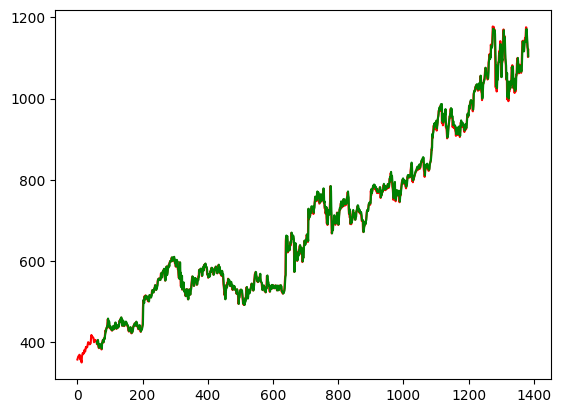

In [39]:
print("Name: S Adithya Chowdary")
print("Register Number: 212221230100")

plt.plot(np.arange(0,1384),price, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='green', label = 'Predicted Google stock price')


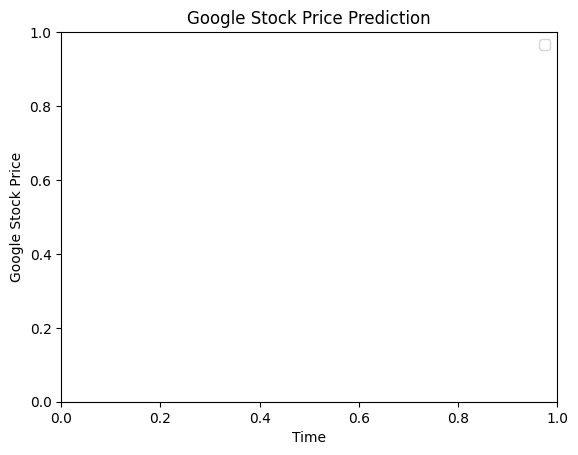

In [42]:
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [43]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test,predicted_stock_price)

540815.3693295658